In [13]:
import seaborn as sbn
import os
import cooler
import matplotlib.pyplot as plt
import numpy as np
import cooltools
import matplotlib.colors as cl
import pandas as pd
import warnings
import bbi
import matplotlib.patches as patches
from NGS import HiCTools as HT
import matplotlib
from typing import Callable
from collections import defaultdict

# Define pdf style

In [4]:
matplotlib.rcParams['pdf.fonttype'] = 42

# Set Wd

In [5]:
os.chdir("/groups/gerlich/experiments/Experiments_004800/004812/Sequencing_data/Pooled_FC_1_2_3_4/cooler/")

# Define colormap

In [6]:
cmapFall = cl.LinearSegmentedColormap.from_list("fall", colors=["white", "orange" ,"red", "black"], N=256)

# Define cooler filehandle

In [10]:
BINSIZE = 500000

repBarcodes = {"rep1": "GATCAG_S5", "rep2": "TTAGGC_S2"}

clrs = {rep: {interType:
        cooler.Cooler(
            f'{barcode}.{interType}.1000.mcool::/resolutions/{BINSIZE}')
        for interType in ["cis", "trans", "all"]
        }
        for rep, barcode in repBarcodes.items()}

# Chromosome 1 long arm

In [11]:
coord = "chr1:160000000-249000000"

In [16]:
examp1 = recDict()
for rep in clrs:
    for rType in ["cis", "trans", "all"]:
        examp1[rep][rType] = clrs[rep][rType].matrix(balance=True).fetch(coord)

## Plot rep1

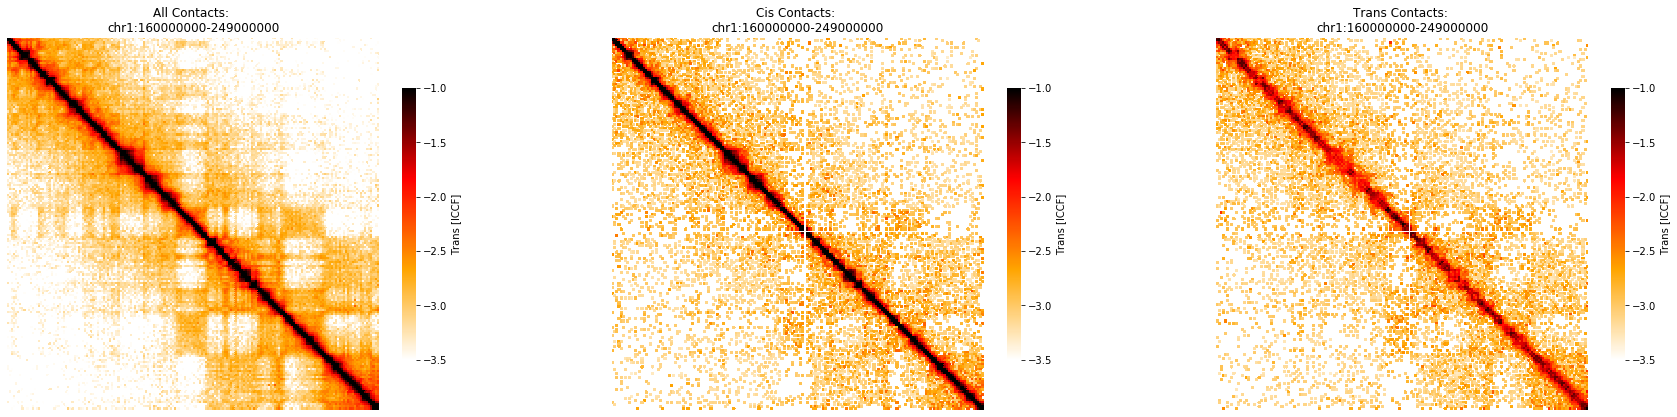

In [17]:
f, ax = plt.subplots(1, 3)
plt.subplots_adjust(wspace=0.3)
sbn.heatmap(np.log10(examp1["rep1"]["all"]), cmap=cmapFall, ax=ax[0], vmin=-3.5, vmax=-1,
            square=True,
            xticklabels=False,
            yticklabels=False,
            rasterized=True,
            cbar_kws={"shrink": 0.5, "label": "Trans [ICCF]"})
sbn.heatmap(np.log10(examp1["rep1"]["cis"]), cmap=cmapFall, ax=ax[1],  vmin=-3.5, vmax=-1,
            square=True,
            xticklabels=False,
            yticklabels=False,
            rasterized=True,
            cbar_kws={"shrink": 0.5, "label": "Trans [ICCF]"})
sbn.heatmap(np.log10(examp1["rep1"]["trans"]), cmap=cmapFall, ax=ax[2],  vmin=-3.5, vmax=-1,
            square=True,
            xticklabels=False,
            yticklabels=False,
            rasterized=True,
            cbar_kws={"shrink": 0.5, "label": "Trans [ICCF]"})
ax[0].set_title(f"All Contacts: \n{coord}")
ax[1].set_title(f"Cis Contacts: \n{coord}")
ax[2].set_title(f"Trans Contacts: \n{coord}")
f.set_size_inches(30, 10)
plt.show()

## Write to file

In [18]:
resultdir = "/groups/gerlich/experiments/Experiments_004800/004812/Results/FC_1_2_3_4/Examples"
f.savefig(os.path.join(resultdir, "Chr1_long_arm_500kb_rep1.png"), bbox_inches="tight")
f.savefig(os.path.join(resultdir, "Chr1_long_arm_500kb_rep1.pdf"), bbox_inches="tight")

## Plot rep2

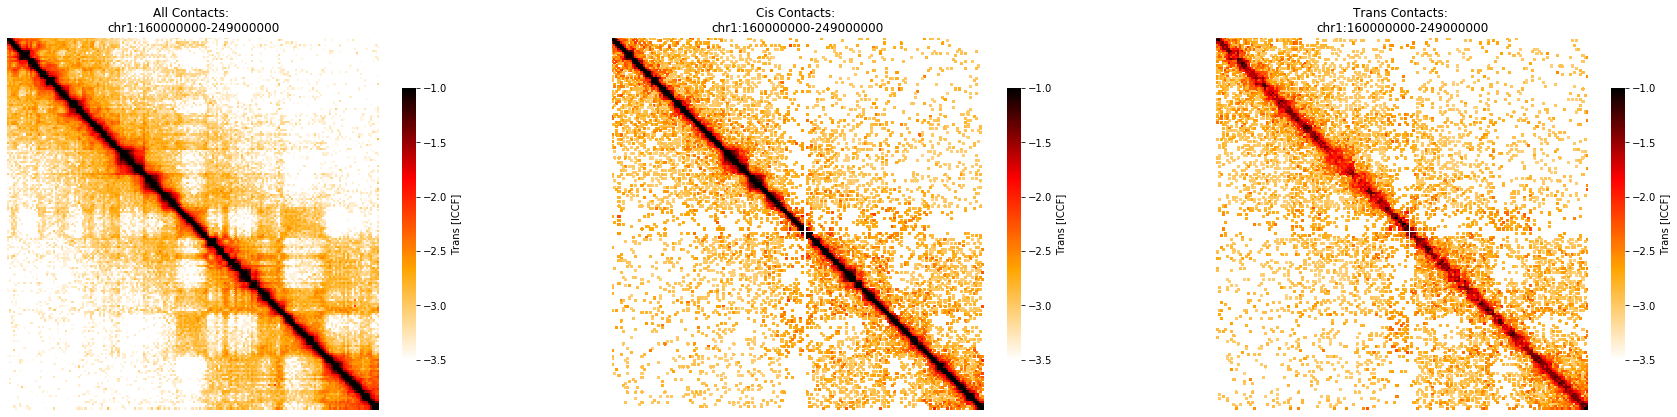

In [19]:
f, ax = plt.subplots(1, 3)
plt.subplots_adjust(wspace=0.3)
sbn.heatmap(np.log10(examp1["rep2"]["all"]), cmap=cmapFall, ax=ax[0], vmin=-3.5, vmax=-1,
            square=True,
            xticklabels=False,
            yticklabels=False,
            rasterized=True,
            cbar_kws={"shrink": 0.5, "label": "Trans [ICCF]"})
sbn.heatmap(np.log10(examp1["rep2"]["cis"]), cmap=cmapFall, ax=ax[1],  vmin=-3.5, vmax=-1,
            square=True,
            xticklabels=False,
            yticklabels=False,
            rasterized=True,
            cbar_kws={"shrink": 0.5, "label": "Trans [ICCF]"})
sbn.heatmap(np.log10(examp1["rep2"]["trans"]), cmap=cmapFall, ax=ax[2],  vmin=-3.5, vmax=-1,
            square=True,
            xticklabels=False,
            yticklabels=False,
            rasterized=True,
            cbar_kws={"shrink": 0.5, "label": "Trans [ICCF]"})
ax[0].set_title(f"All Contacts: \n{coord}")
ax[1].set_title(f"Cis Contacts: \n{coord}")
ax[2].set_title(f"Trans Contacts: \n{coord}")
f.set_size_inches(30, 10)
plt.show()

## Write to file

In [20]:
resultdir = "/groups/gerlich/experiments/Experiments_004800/004812/Results/FC_1_2_3_4/Examples"
f.savefig(os.path.join(resultdir, "Chr1_long_arm_500kb_rep2.png"), bbox_inches="tight")
f.savefig(os.path.join(resultdir, "Chr1_long_arm_500kb_rep2.pdf"), bbox_inches="tight")